In [44]:
from dataclasses import dataclass

TEA = 11
EMPTY = 0

@dataclass(init=False)
class Food:
    name: str;
    proteins: float;
    fats: float;
    carbones: float;
    calories: float;

    def __init__(self, name: str, proteins: float, fats: float, carbones: float) -> None:
        self.name = name
        self.proteins = proteins
        self.fats = fats
        self.carbones = carbones
        self.calories = proteins * 4 + carbones * 4 + fats * 9



food = [
    Food("empty", 0, 0, 0),
    Food("творог", 16.0, 9.0, 3.0),
    Food("овсяна каша", 10.0, 6.0, 68.0),
    Food("мюсли", 7.5, 13.0, 62.0),
    Food("бутерброд с сыром", 12.8, 16.2, 29.6),
    Food("бутерброд с колбасой", 9.3, 13.3, 29.6),
    Food("торт", 4.8, 29.1, 54.3),
    Food("шашлык из свинины", 15.0, 17.8, 0.4),
    Food("банан", 1.5, 0.5, 21.0),
    Food("апельсин", 0.9, 0.2, 8.1),
    Food("яблоко", 0.4, 0.4, 9.8),
    Food("чай", 0.1, 0.0, 0.2),
]

display([str(item) for item in food])

["Food(name='empty', proteins=0, fats=0, carbones=0, calories=0)",
 "Food(name='творог', proteins=16.0, fats=9.0, carbones=3.0, calories=157.0)",
 "Food(name='овсяна каша', proteins=10.0, fats=6.0, carbones=68.0, calories=366.0)",
 "Food(name='мюсли', proteins=7.5, fats=13.0, carbones=62.0, calories=395.0)",
 "Food(name='бутерброд с сыром', proteins=12.8, fats=16.2, carbones=29.6, calories=315.4)",
 "Food(name='бутерброд с колбасой', proteins=9.3, fats=13.3, carbones=29.6, calories=275.3)",
 "Food(name='торт', proteins=4.8, fats=29.1, carbones=54.3, calories=498.3)",
 "Food(name='шашлык из свинины', proteins=15.0, fats=17.8, carbones=0.4, calories=221.8)",
 "Food(name='банан', proteins=1.5, fats=0.5, carbones=21.0, calories=94.5)",
 "Food(name='апельсин', proteins=0.9, fats=0.2, carbones=8.1, calories=37.8)",
 "Food(name='яблоко', proteins=0.4, fats=0.4, carbones=9.8, calories=44.400000000000006)",
 "Food(name='чай', proteins=0.1, fats=0.0, carbones=0.2, calories=1.2000000000000002)"]

In [45]:
import pandas as pd

df = pd.DataFrame(columns=["name", "prt", "fat", "crb", "cal"])

for item in food:
    df.loc[len(df.index)] = [item.name, item.proteins, item.fats, item.carbones, item.calories]

df

,name,prt,fat,crb,cal
0,empty,0.0,0.0,0.0,0.0
1,творог,16.0,9.0,3.0,157.0
2,овсяна каша,10.0,6.0,68.0,366.0
3,мюсли,7.5,13.0,62.0,395.0
4,бутерброд с сыром,12.8,16.2,29.6,315.4
5,бутерброд с колбасой,9.3,13.3,29.6,275.3
6,торт,4.8,29.1,54.3,498.3
7,шашлык из свинины,15.0,17.8,0.4,221.8
8,банан,1.5,0.5,21.0,94.5
9,апельсин,0.9,0.2,8.1,37.8


In [46]:
from typing import List

from pandas import DataFrame


def my_print(df:DataFrame, data: List[List[int]]) -> List[List[str]]:
    return [[str(df.loc[element]["name"]) for element in item] for item in data]

In [47]:
import numpy as np

POPULATION_COUNT = 30
GENE_SIZE = 4

def my_population(food: List[int], count: int, size: int, tea = False) -> List[List[int]]:
    population: List[List[int]] = []
    while len(population) < count:
        element: List[int] = [-1] * size
        to = size
        if tea:
            element[-1] = TEA
            to = size - 1
        for position in range(to):
            value = np.random.choice(range(len(food)))
            element[position] = food[value]
        population.append(element)
    return population

population = my_population(list(df.index.values), POPULATION_COUNT, GENE_SIZE, True)
display(len(population))
display(my_print(df, population))

30

[['мюсли', 'шашлык из свинины', 'торт', 'чай'],
 ['бутерброд с сыром', 'апельсин', 'мюсли', 'чай'],
 ['апельсин', 'яблоко', 'мюсли', 'чай'],
 ['бутерброд с колбасой', 'empty', 'бутерброд с колбасой', 'чай'],
 ['торт', 'empty', 'торт', 'чай'],
 ['чай', 'творог', 'шашлык из свинины', 'чай'],
 ['бутерброд с сыром', 'яблоко', 'бутерброд с колбасой', 'чай'],
 ['овсяна каша', 'банан', 'овсяна каша', 'чай'],
 ['апельсин', 'empty', 'торт', 'чай'],
 ['empty', 'апельсин', 'апельсин', 'чай'],
 ['бутерброд с колбасой', 'мюсли', 'чай', 'чай'],
 ['банан', 'шашлык из свинины', 'творог', 'чай'],
 ['бутерброд с колбасой', 'банан', 'мюсли', 'чай'],
 ['шашлык из свинины', 'бутерброд с сыром', 'empty', 'чай'],
 ['шашлык из свинины', 'торт', 'чай', 'чай'],
 ['чай', 'бутерброд с колбасой', 'шашлык из свинины', 'чай'],
 ['бутерброд с колбасой', 'мюсли', 'шашлык из свинины', 'чай'],
 ['овсяна каша', 'творог', 'шашлык из свинины', 'чай'],
 ['бутерброд с колбасой', 'empty', 'творог', 'чай'],
 ['овсяна каша', 'ч

In [48]:
from sklearn.preprocessing import MinMaxScaler


desired_calories = 400
desired_protein_ratio = 20
desired_fat_ratio = 30
desired_carbon_ratio = 50

# https://www.sports.ru/health/blogs/3113398.html
def my_fitness(data: DataFrame, breakfast: List[int], debug = False) -> float:
    food = data.loc[breakfast]

    total_calories = food["cal"].sum()
    total_protein = food["prt"].sum()
    total_fats = food["fat"].sum()
    total_carbones = food["crb"].sum()

    protein_ratio = total_protein * 4 / total_calories * 100;
    fat_ratio = total_fats * 9 / total_calories * 100;
    carbon_ratio = total_carbones * 4 / total_calories * 100;

    if debug:
        display(f"cal = {total_calories}; p = {total_protein}; f = {total_fats}; c = {total_carbones}")
        display(f"pr = {protein_ratio}; fr = {fat_ratio}; cr = {carbon_ratio}")

    calories_diff = np.abs(total_calories - desired_calories)
    protein_diff = np.abs(protein_ratio - desired_protein_ratio)
    fat_diff = np.abs(fat_ratio - desired_fat_ratio)
    carbon_diff =  np.abs(carbon_ratio - desired_carbon_ratio)
    if debug:
        display(f"cald={calories_diff}; pd={protein_diff}; fd={fat_diff}; cd={carbon_diff}")

    return calories_diff + protein_diff + fat_diff + carbon_diff

# творог, банан, чай, пусто
display(my_fitness(df, [1, 8, TEA, EMPTY], True))

'cal = 252.7; p = 17.6; f = 9.5; c = 24.2'

'pr = 27.859121487930356; fr = 33.83458646616542; cr = 38.306292045904236'

'cald=147.3; pd=7.859121487930356; fd=3.834586466165419; cd=11.693707954095764'

170.68741590819155

In [49]:
def my_crossover(item1: List[int], item2: List[int], size: int) -> List[int]:
    random_split_point = np.random.choice(range(size - 1))
    item1[random_split_point:] = item2[random_split_point:]
    return item1

for i in range(4):
    # творог, яблоко, апельсин, чай
    # шашлык, торт, пусто, чай
    display(my_print(df, [my_crossover([1, 10, 9, TEA], [7, 6, EMPTY, TEA], 4)]))

[['творог', 'яблоко', 'empty', 'чай']]

[['шашлык из свинины', 'торт', 'empty', 'чай']]

[['творог', 'яблоко', 'empty', 'чай']]

[['творог', 'торт', 'empty', 'чай']]

In [50]:
def my_mutation(food: List[int], population: List[List[int]], size: int, proba = 1.0, debug = False) -> List[List[int]]:
    for element in range(len(population)):
        if np.random.random(1)[0] > proba:
            continue
        position = np.random.choice(range(size - 1))
        new_value = np.random.choice(range(len(food)))
        if debug:
            display(f"e={element + 1}; p={position + 1}; v={new_value + 1}")
        population[element][position] = food[new_value]
    return population


display(my_print(df, my_mutation(list(df.index.values), population[:4], GENE_SIZE, debug=True)))

'e=1; p=3; v=6'

'e=2; p=2; v=7'

'e=3; p=3; v=2'

'e=4; p=3; v=8'

[['мюсли', 'шашлык из свинины', 'бутерброд с колбасой', 'чай'],
 ['бутерброд с сыром', 'торт', 'мюсли', 'чай'],
 ['апельсин', 'яблоко', 'творог', 'чай'],
 ['бутерброд с колбасой', 'empty', 'шашлык из свинины', 'чай']]

/Users/user/Projects/python/mai/.venv/lib/python3.12/site-packages/pygad/pygad.py:1136: UserWarning: Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.
  warnings.warn("Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.")
/Users/user/Projects/python/mai/.venv/lib/python3.12/site-packages/pygad/visualize/plot.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplt.legend()


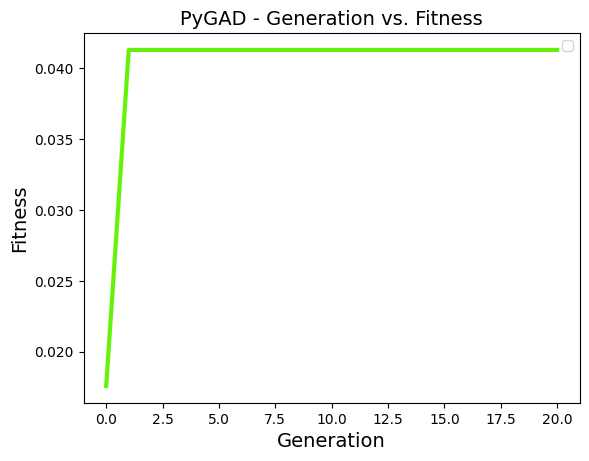

(array([ 8,  0,  4, 11]), 0.041286663937694715, 0)

[['овсяна каша', 'чай', 'апельсин', 'чай'],
 ['банан', 'empty', 'бутерброд с сыром', 'чай'],
 ['банан', 'empty', 'бутерброд с сыром', 'чай'],
 ['банан', 'empty', 'бутерброд с сыром', 'чай'],
 ['банан', 'empty', 'бутерброд с сыром', 'чай'],
 ['банан', 'empty', 'бутерброд с сыром', 'чай'],
 ['банан', 'empty', 'бутерброд с сыром', 'чай'],
 ['банан', 'empty', 'бутерброд с сыром', 'чай'],
 ['банан', 'empty', 'бутерброд с сыром', 'чай'],
 ['банан', 'empty', 'бутерброд с сыром', 'чай'],
 ['банан', 'empty', 'бутерброд с сыром', 'чай'],
 ['банан', 'empty', 'бутерброд с сыром', 'чай'],
 ['банан', 'empty', 'бутерброд с сыром', 'чай'],
 ['банан', 'empty', 'бутерброд с сыром', 'чай'],
 ['банан', 'empty', 'бутерброд с сыром', 'чай'],
 ['банан', 'empty', 'бутерброд с сыром', 'чай'],
 ['банан', 'empty', 'бутерброд с сыром', 'чай'],
 ['банан', 'empty', 'бутерброд с сыром', 'чай'],
 ['банан', 'empty', 'бутерброд с сыром', 'чай'],
 ['банан', 'empty', 'бутерброд с сыром', 'чай'],
 ['банан', 'empty', 'буте

[['банан', 'empty', 'бутерброд с сыром', 'чай']]

'cal = 411.09999999999997; p = 14.4; f = 16.7; c = 50.800000000000004'

'pr = 14.011189491607883; fr = 36.56044757966431; cr = 49.42836292872781'

'cald=11.099999999999966; pd=5.988810508392117; fd=6.560447579664313; cd=0.5716370712721925'

24.220895159328588

In [79]:
import pygad


def fitness_func(ga_instanse, solution, solution_idx):
    return 1 / (my_fitness(df, solution) + 0.000001)


def parent_selection_func(fitness, num_parents, ga_instance):
    fitness_sorted = sorted(range(len(fitness)), key=lambda k: fitness[k])
    fitness_sorted.reverse()

    parents = np.empty((num_parents, ga_instance.population.shape[1]))

    for parent_num in range(num_parents):
        parents[parent_num, :] = ga_instance.population[
            fitness_sorted[parent_num], :
        ].copy()

    return parents, np.array(fitness_sorted[:num_parents])


def crossover_func(parents, offspring_size, ga_instance):
    offspring = []
    idx = 0
    while len(offspring) != offspring_size[0]:
        parent1 = parents[idx % parents.shape[0], :].copy()
        parent2 = parents[(idx + 1) % parents.shape[0], :].copy()
        if np.random.random(1)[0] > ga_instance.crossover_probability:
            offspring.append(parent1)
        else:
            result = my_crossover(parent1, parent2, GENE_SIZE)
            offspring.append(result)

        idx += 1
    return np.array(offspring)

def mutation_func(offspring, ga_instance):
    return my_mutation(list(df.index.values), offspring, GENE_SIZE, ga_instance.mutation_probability)

ga = pygad.GA(
    gene_type=int,
    num_generations=20,
    initial_population=population,
    num_parents_mating=int(POPULATION_COUNT * 0.3),
    fitness_func=fitness_func,
    parent_selection_type=parent_selection_func,  # type: ignore
    crossover_type=crossover_func,  # type: ignore
    crossover_probability=1.0,
    mutation_type=mutation_func,  # type: ignore
    mutation_probability=0.3,
    save_best_solutions=True,
)

ga.run()
ga.plot_fitness()
display(ga.best_solution())

display(my_print(df, [sol for sol in ga.best_solutions]))

my_breakfast = list(ga.best_solution()[0])
display(my_print(df, [my_breakfast]))
display(my_fitness(df, my_breakfast, True))

In [52]:
fooddf = pd.read_csv("data/food/food-ga.csv")

display(fooddf.info())
fooddf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    335 non-null    object 
 1   prt     335 non-null    float64
 2   fat     335 non-null    float64
 3   crb     335 non-null    float64
 4   cal     335 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.2+ KB


None

,name,prt,fat,crb,cal
0,Cows' milk,32.0,40.0,48.0,660.000
1,Milk skim,36.0,0.0,52.0,360.000
2,Buttermilk,9.0,5.0,13.0,127.000
3,"Evaporated, undiluted",16.0,20.0,24.0,345.000
4,Fortified milk,89.0,42.0,119.0,1.373
...,...,...,...,...,...
330,Fruit-flavored soda,0.0,0.0,42.0,161.000
331,Ginger ale,0.0,0.0,28.0,105.000
332,Root beer,0.0,0.0,35.0,140.000
333,Coffee,0.0,0.0,1.0,3.000


In [60]:
NEW_POPULATION_COUNT = 100

new_population = my_population(list(fooddf.index.values), NEW_POPULATION_COUNT, GENE_SIZE)
display(len(new_population))
display(my_print(fooddf, new_population))

100

[['Brazil nuts', 'Fruit cake', 'Yolks', 'Clam chowder'],
 ['Spanish rice',
  'Chocolate fudge',
  'Stewed or canned',
  'Grapefruit, fresh, 5" diameter'],
 ['Potatoes, baked', 'Sauerkraut', 'Beef', 'Beef'],
 ['Lambs quarters, steamed',
  'Lambs quarters, steamed',
  'Sardines',
  'Sardines'],
 ['Gingerbread', 'White', 'Fruit cocktail, canned', 'Cashews'],
 ['Lamb, chop, broiled',
  'Pancakes 4" diam.',
  'European, as Muscat, Tokay',
  'Lemonade concentratefrozen'],
 ['Beet greens', 'Cream soups', 'Stalk raw', 'Corned beef'],
 ['Stalk raw', 'Turkey', 'French-fried', 'Sesame seeds'],
 ['Grapes', 'Lamb, chop, broiled', 'Processed cheese', 'Ground lean'],
 ['Potatoes, baked', 'Wheat (whole)', 'Okra', 'Beetroots'],
 ['Oyster stew', 'Cheddar, grated cup', 'Lard', 'Gingerbread'],
 ['Root beer', 'Beef', 'Custard', 'Oyster stew'],
 ['Potatoes Mashed with milk and butter',
  'Processed cheese',
  'Marshmallows',
  'Pecans'],
 ['Turkey', 'Flounder', 'Pineapple juice', 'Spaghetti with meat sauce'

/Users/user/Projects/python/mai/.venv/lib/python3.12/site-packages/pygad/pygad.py:1136: UserWarning: Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.
  warnings.warn("Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.")
/Users/user/Projects/python/mai/.venv/lib/python3.12/site-packages/pygad/visualize/plot.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplt.legend()


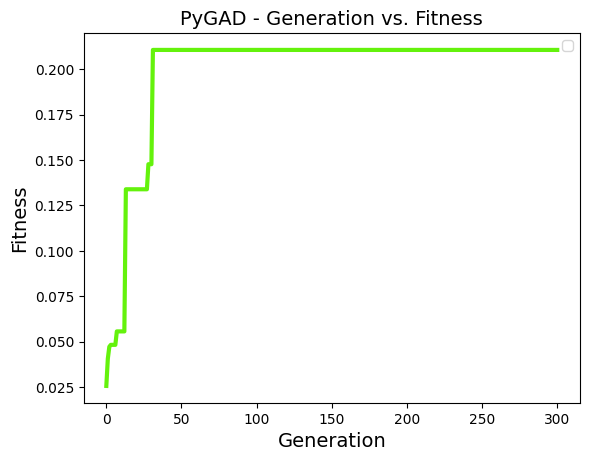

(array([250, 141,  83, 110]), 0.21052627146815336, 0)

[['Bran flakes', 'Honey', 'Peppers canned', 'Shad'],
 ['Tangerines',
  'Table (12.2% alcohol)',
  'Chicken livers, fried',
  'Cornflakes'],
 ['Collards', 'Table (12.2% alcohol)', 'Chicken livers, fried', 'Cornflakes'],
 ['Watermelon', 'Oatmeal', 'Corned beef hash canned', 'Stalk raw'],
 ['Watermelon', 'Oatmeal', 'Corned beef hash canned', 'Stalk raw'],
 ['Watermelon', 'Oatmeal', 'Corned beef hash canned', 'Stalk raw'],
 ['Watermelon', 'Oatmeal', 'Corned beef hash canned', 'Stalk raw'],
 ['Sponge cake', 'Oatmeal', 'Corned beef hash canned', 'Stalk raw'],
 ['Sponge cake', 'Oatmeal', 'Corned beef hash canned', 'Stalk raw'],
 ['Sponge cake', 'Oatmeal', 'Corned beef hash canned', 'Stalk raw'],
 ['Sponge cake', 'Oatmeal', 'Corned beef hash canned', 'Stalk raw'],
 ['Sponge cake', 'Oatmeal', 'Corned beef hash canned', 'Stalk raw'],
 ['Sponge cake', 'Oatmeal', 'Corned beef hash canned', 'Stalk raw'],
 ['Watermelon', 'French-fried', 'Oyster stew', 'Stalk raw'],
 ['Watermelon', 'French-fried', 'O

[['Rice flakes', 'French-fried', 'Oyster stew', 'Stalk raw']]

'cal = 400.0; p = 21.0; f = 13.0; c = 47.0'

'pr = 21.0; fr = 29.25; cr = 47.0'

'cald=0.0; pd=1.0; fd=0.75; cd=3.0'

4.75

In [ ]:
def new_fitness_func(ga_instanse, solution, solution_idx):
    return 1 / (my_fitness(fooddf, solution) + 0.000001)


def new_mutation_func(offspring, ga_instance):
    return my_mutation(
        list(fooddf.index.values), offspring, GENE_SIZE, ga_instance.mutation_probability
    )


new_ga = pygad.GA(
    gene_type=int,
    num_generations=300,
    initial_population=new_population,
    num_parents_mating=int(NEW_POPULATION_COUNT * 0.3),
    fitness_func=new_fitness_func,
    parent_selection_type=parent_selection_func,  # type: ignore
    crossover_type=crossover_func,  # type: ignore
    crossover_probability=1.0,
    mutation_type=new_mutation_func,  # type: ignore
    mutation_probability=0.5,
    save_best_solutions=True,
)

new_ga.run()
new_ga.plot_fitness()
display(new_ga.best_solution())

display(my_print(fooddf, [sol for sol in new_ga.best_solutions]))

my_new_breakfast = list(new_ga.best_solution()[0])
display(my_print(fooddf, [my_new_breakfast]))
display(my_fitness(fooddf, my_new_breakfast, True))